Будем решать задачу классификации вина по его химическим свойствам. 


In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine(as_frame = True)

X = data.data
X = X[X.columns[:7]]

y = data.target 

In [ ]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69



Сведем задачу к бинарной классификации: будем определять, является ли вино вином типа 1 или нет.


In [ ]:
y[y != 1] = 0

y.value_counts()

0    107
1     71
Name: target, dtype: int64

Разобъем данные на train и test.

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

Приведем признаки к одному масштабу.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = pd.DataFrame(scaler.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns=X.columns)

Обучим метод опорных векторов на тренировочных данных и оценим качество на тестовых данных при помощи метрики ROC-AUC.

Метрика ROC-AUC оперирует в терминах вероятностей, поэтому для ее вычисления алгоритм должен предсказывать вероятности (методом `predict_proba`).

In [ ]:
from sklearn.svm import SVC 

model = SVC(kernel = 'linear', probability=True)

model.fit(Xtrain, ytrain)

SVC(kernel='linear', probability=True)

In [ ]:
pred = model.predict(Xtest)

In [ ]:
probs = model.predict_proba(Xtest)[:,1]

In [ ]:
probs[:10]

array([0.00231791, 0.00166436, 0.00476495, 0.22037706, 0.99669561,
       0.00342484, 0.97160225, 0.00887892, 0.98579225, 0.01033591])

In [ ]:
classes = probs > 0.8

In [ ]:
pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, \
recall_score, f1_score

print('accuracy:', accuracy_score(ytest, classes))

accuracy: 0.8888888888888888


In [ ]:
confusion_matrix(ytest, classes)

array([[33,  0],
       [ 6, 15]])

In [ ]:
print('precision:', precision_score(ytest, classes))

precision: 1.0


In [ ]:
print('recall:', recall_score(ytest, classes))

recall: 0.7142857142857143


In [ ]:
print('f1:', f1_score(ytest, classes))

f1: 0.8333333333333333


Для оценки качества будем использовать метрику ROC-AUC.

In [ ]:
from sklearn.metrics import roc_auc_score

pred = model.predict_proba(Xtest)[:,1]

roc_auc_score(ytest, pred)

0.9624819624819625

In [ ]:
classes = model.predict(Xtest)

print(classes[:5])
print(pred[:5])

[0 0 0 0 1]
[0.00341333 0.00251961 0.00660703 0.21805716 0.99402487]


Также можем нарисовать полученную ROC-кривую.

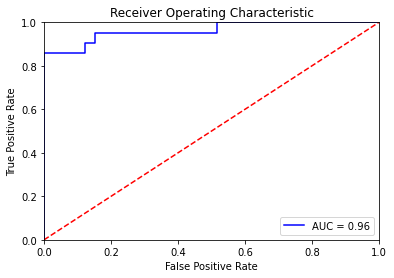

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(ytest, pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();